In [1]:
import pandas as pd

dat = pd.read_csv('text_train_labelled.csv')
dat['LABEL'].value_counts()

0    126
1     96
2     78
Name: LABEL, dtype: int64

In [2]:
test = pd.read_csv('text_test.csv')

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline_nb = Pipeline([
    ('vec', TfidfVectorizer()),
    ('nb', MultinomialNB()),
])

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       126
           1       0.97      0.96      0.96        96
           2       1.00      0.62      0.76        78

    accuracy                           0.89       300
   macro avg       0.92      0.86      0.87       300
weighted avg       0.91      0.89      0.88       300



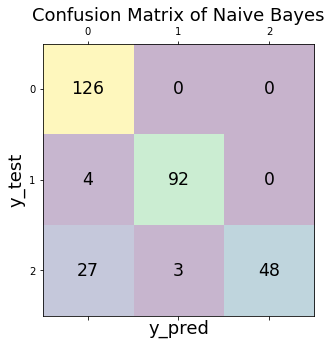

In [4]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

pipeline_nb.fit(dat['text'], dat['LABEL'])
y_pred_train = pipeline_nb.predict(dat['text'])
print(classification_report(dat['LABEL'], y_pred_train))
labels = ['Neutral', 'Negative', 'Positive']

conf_matrix = confusion_matrix(dat['LABEL'], y_pred_train)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('y_pred', fontsize=18)
plt.ylabel('y_test', fontsize=18)
plt.title('Confusion Matrix of Naive Bayes', fontsize=18)
plt.savefig('conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
import numpy as np
from sklearn.inspection import permutation_importance
tf = TfidfVectorizer()
X = tf.fit_transform(dat['text']).todense()
nb = MultinomialNB().fit(X, dat['LABEL'])

imps = permutation_importance(nb, X, dat['LABEL'])
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(20):
    print("%d. %s (%f)" % (f + 1, tf.get_feature_names()[indices[f]], importances[indices[f]]))

Feature ranking:
1. my (0.009333)
2. been (0.006667)
3. cryptocurrency (0.006667)
4. let (0.006667)
5. gamers (0.006667)
6. 99 (0.006667)
7. ti (0.006000)
8. re (0.006000)
9. one (0.006000)
10. version (0.005333)
11. prices (0.004667)
12. think (0.004667)
13. cool (0.004667)
14. know (0.004667)
15. so (0.004667)
16. very (0.004000)
17. get (0.004000)
18. if (0.004000)
19. there (0.004000)
20. also (0.004000)


In [61]:
y_pred_test = pipeline_nb.predict(test['text'])
test['LABEL']= y_pred_test
test['LABEL'].value_counts()

0    2583
1     469
2      11
Name: LABEL, dtype: int64

In [62]:
test[test['LABEL'] == 2]

,LABEL,text,like,published_month
368,2,if nvidia re release the 2060 at a 3050 price...,0,Sep-21
542,2,gtx1650 can be bought for 150 usd 136 euro an...,1,Oct-19
1078,2,well in my country greece the cheapest 3090 y...,0,Jan-21
1123,2,i'm waiting until the rtx benchmark videos so...,40,Aug-18
1203,2,nvidia rtx 300 series lineup rtx 3060 rtx 306...,0,Jul-20
1625,2,yeah my gpu died a week ago i'm stuck with so...,0,Jan-21
2052,2,i got my 3090 fe at msrp it was cheaper than ...,26,Aug-21
2458,2,the rtx 3090 super will deliver a staggering ...,0,Aug-21
2459,2,my gtx 750ti runs rust on high settings excep...,0,Jan-21
2646,2,if i were releasing a product line like gpus ...,0,Sep-20


In [63]:
dat['published_month'].value_counts()

Nov-20    36
Jun-18    22
Jan-21    18
Sep-21    15
Feb-21    15
Aug-21    15
Apr-21    14
Sep-20    14
Aug-18    14
Oct-20    13
Jul-19    12
Dec-20    11
Oct-19     9
Jun-19     8
May-21     8
Mar-21     7
Aug-19     7
Mar-20     7
Feb-19     6
Aug-20     6
May-20     6
Jul-21     6
Sep-18     5
Nov-19     5
Jun-20     5
Jun-21     4
Apr-19     3
Jan-19     3
Apr-20     2
Jul-18     1
Sep-19     1
Dec-19     1
Feb-20     1
Name: published_month, dtype: int64

In [64]:
label_by_month = {
    'month': list(dat['published_month']) + list(test['published_month']),
    'label': list(dat['LABEL']) + list(test['LABEL'])
}

In [82]:
month = []
for y in [18,19,20,21]:
    for m in 'Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec'.split(','):
        month.append(f'{m}-{y}')
month

['Jan-18',
 'Feb-18',
 'Mar-18',
 'Apr-18',
 'May-18',
 'Jun-18',
 'Jul-18',
 'Aug-18',
 'Sep-18',
 'Oct-18',
 'Nov-18',
 'Dec-18',
 'Jan-19',
 'Feb-19',
 'Mar-19',
 'Apr-19',
 'May-19',
 'Jun-19',
 'Jul-19',
 'Aug-19',
 'Sep-19',
 'Oct-19',
 'Nov-19',
 'Dec-19',
 'Jan-20',
 'Feb-20',
 'Mar-20',
 'Apr-20',
 'May-20',
 'Jun-20',
 'Jul-20',
 'Aug-20',
 'Sep-20',
 'Oct-20',
 'Nov-20',
 'Dec-20',
 'Jan-21',
 'Feb-21',
 'Mar-21',
 'Apr-21',
 'May-21',
 'Jun-21',
 'Jul-21',
 'Aug-21',
 'Sep-21',
 'Oct-21',
 'Nov-21',
 'Dec-21']

In [83]:
month_dict = {m: i for i, m in enumerate(month)}
count = {0: [1 for _ in range(len(month))], 1: [1 for _ in range(len(month))], 2: [1 for _ in range(len(month))]}
for m, l in zip(label_by_month['month'], label_by_month['label']):
    count[l][month_dict[m]] += 1

df = pd.DataFrame({'Month': month,
                   'Neutral': count[0],
                   'Negative': count[1],
                   'Positive': count[2],})
df.head(10)

,Month,Neutral,Negative,Positive
0,Jan-18,1,1,1
1,Feb-18,1,1,1
2,Mar-18,1,1,1
3,Apr-18,1,1,1
4,May-18,1,1,1
5,Jun-18,121,71,8
6,Jul-18,27,6,1
7,Aug-18,157,14,8
8,Sep-18,44,2,3
9,Oct-18,13,4,1


In [84]:
df['Score'] = df['Positive'] - df['Negative']
df.head(10)

,Month,Neutral,Negative,Positive,Score
0,Jan-18,1,1,1,0
1,Feb-18,1,1,1,0
2,Mar-18,1,1,1,0
3,Apr-18,1,1,1,0
4,May-18,1,1,1,0
5,Jun-18,121,71,8,-63
6,Jul-18,27,6,1,-5
7,Aug-18,157,14,8,-6
8,Sep-18,44,2,3,1
9,Oct-18,13,4,1,-3


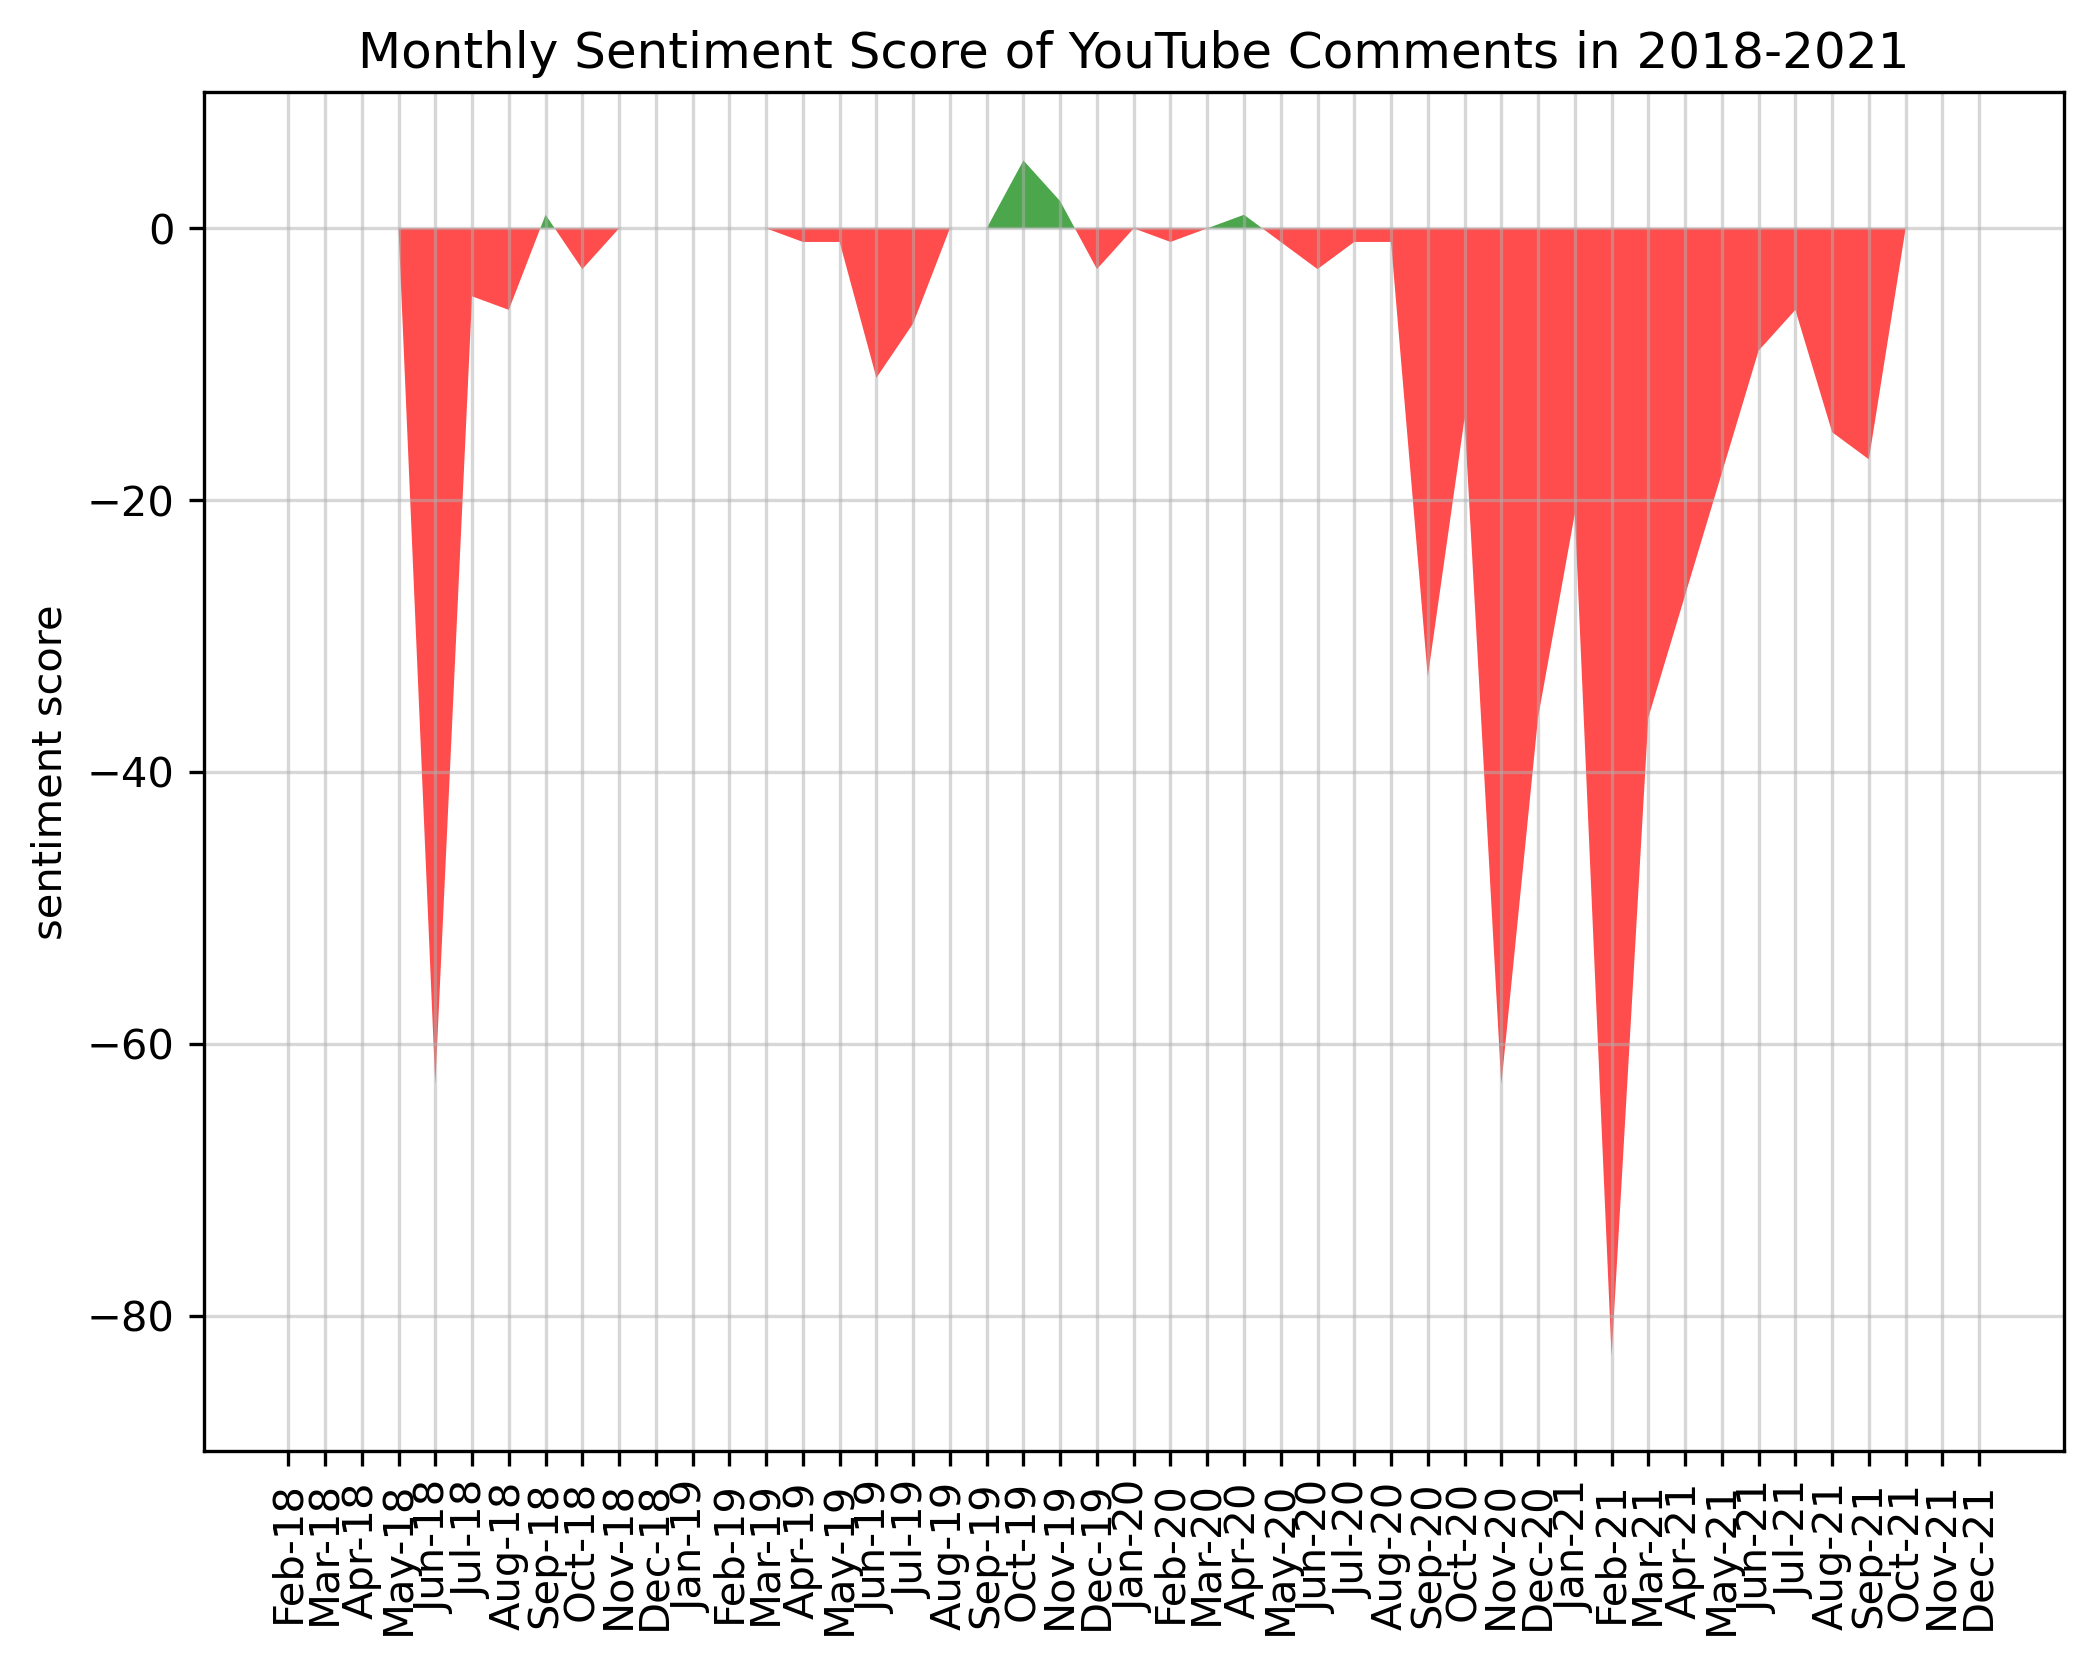

In [85]:
x, y = df['Month'], df['Score']

plt.figure(figsize=(8,6), dpi=300)
plt.fill_between(x[1:], y[1:], 0, where=y[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y[1:], 0, where=y[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)
plt.ylim(-90,10)
plt.title('Monthly Sentiment Score of YouTube Comments in 2018-2021')
plt.ylabel('sentiment score')
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.savefig('sentiment_score.png', dpi=300, bbox_inches='tight')
plt.show()

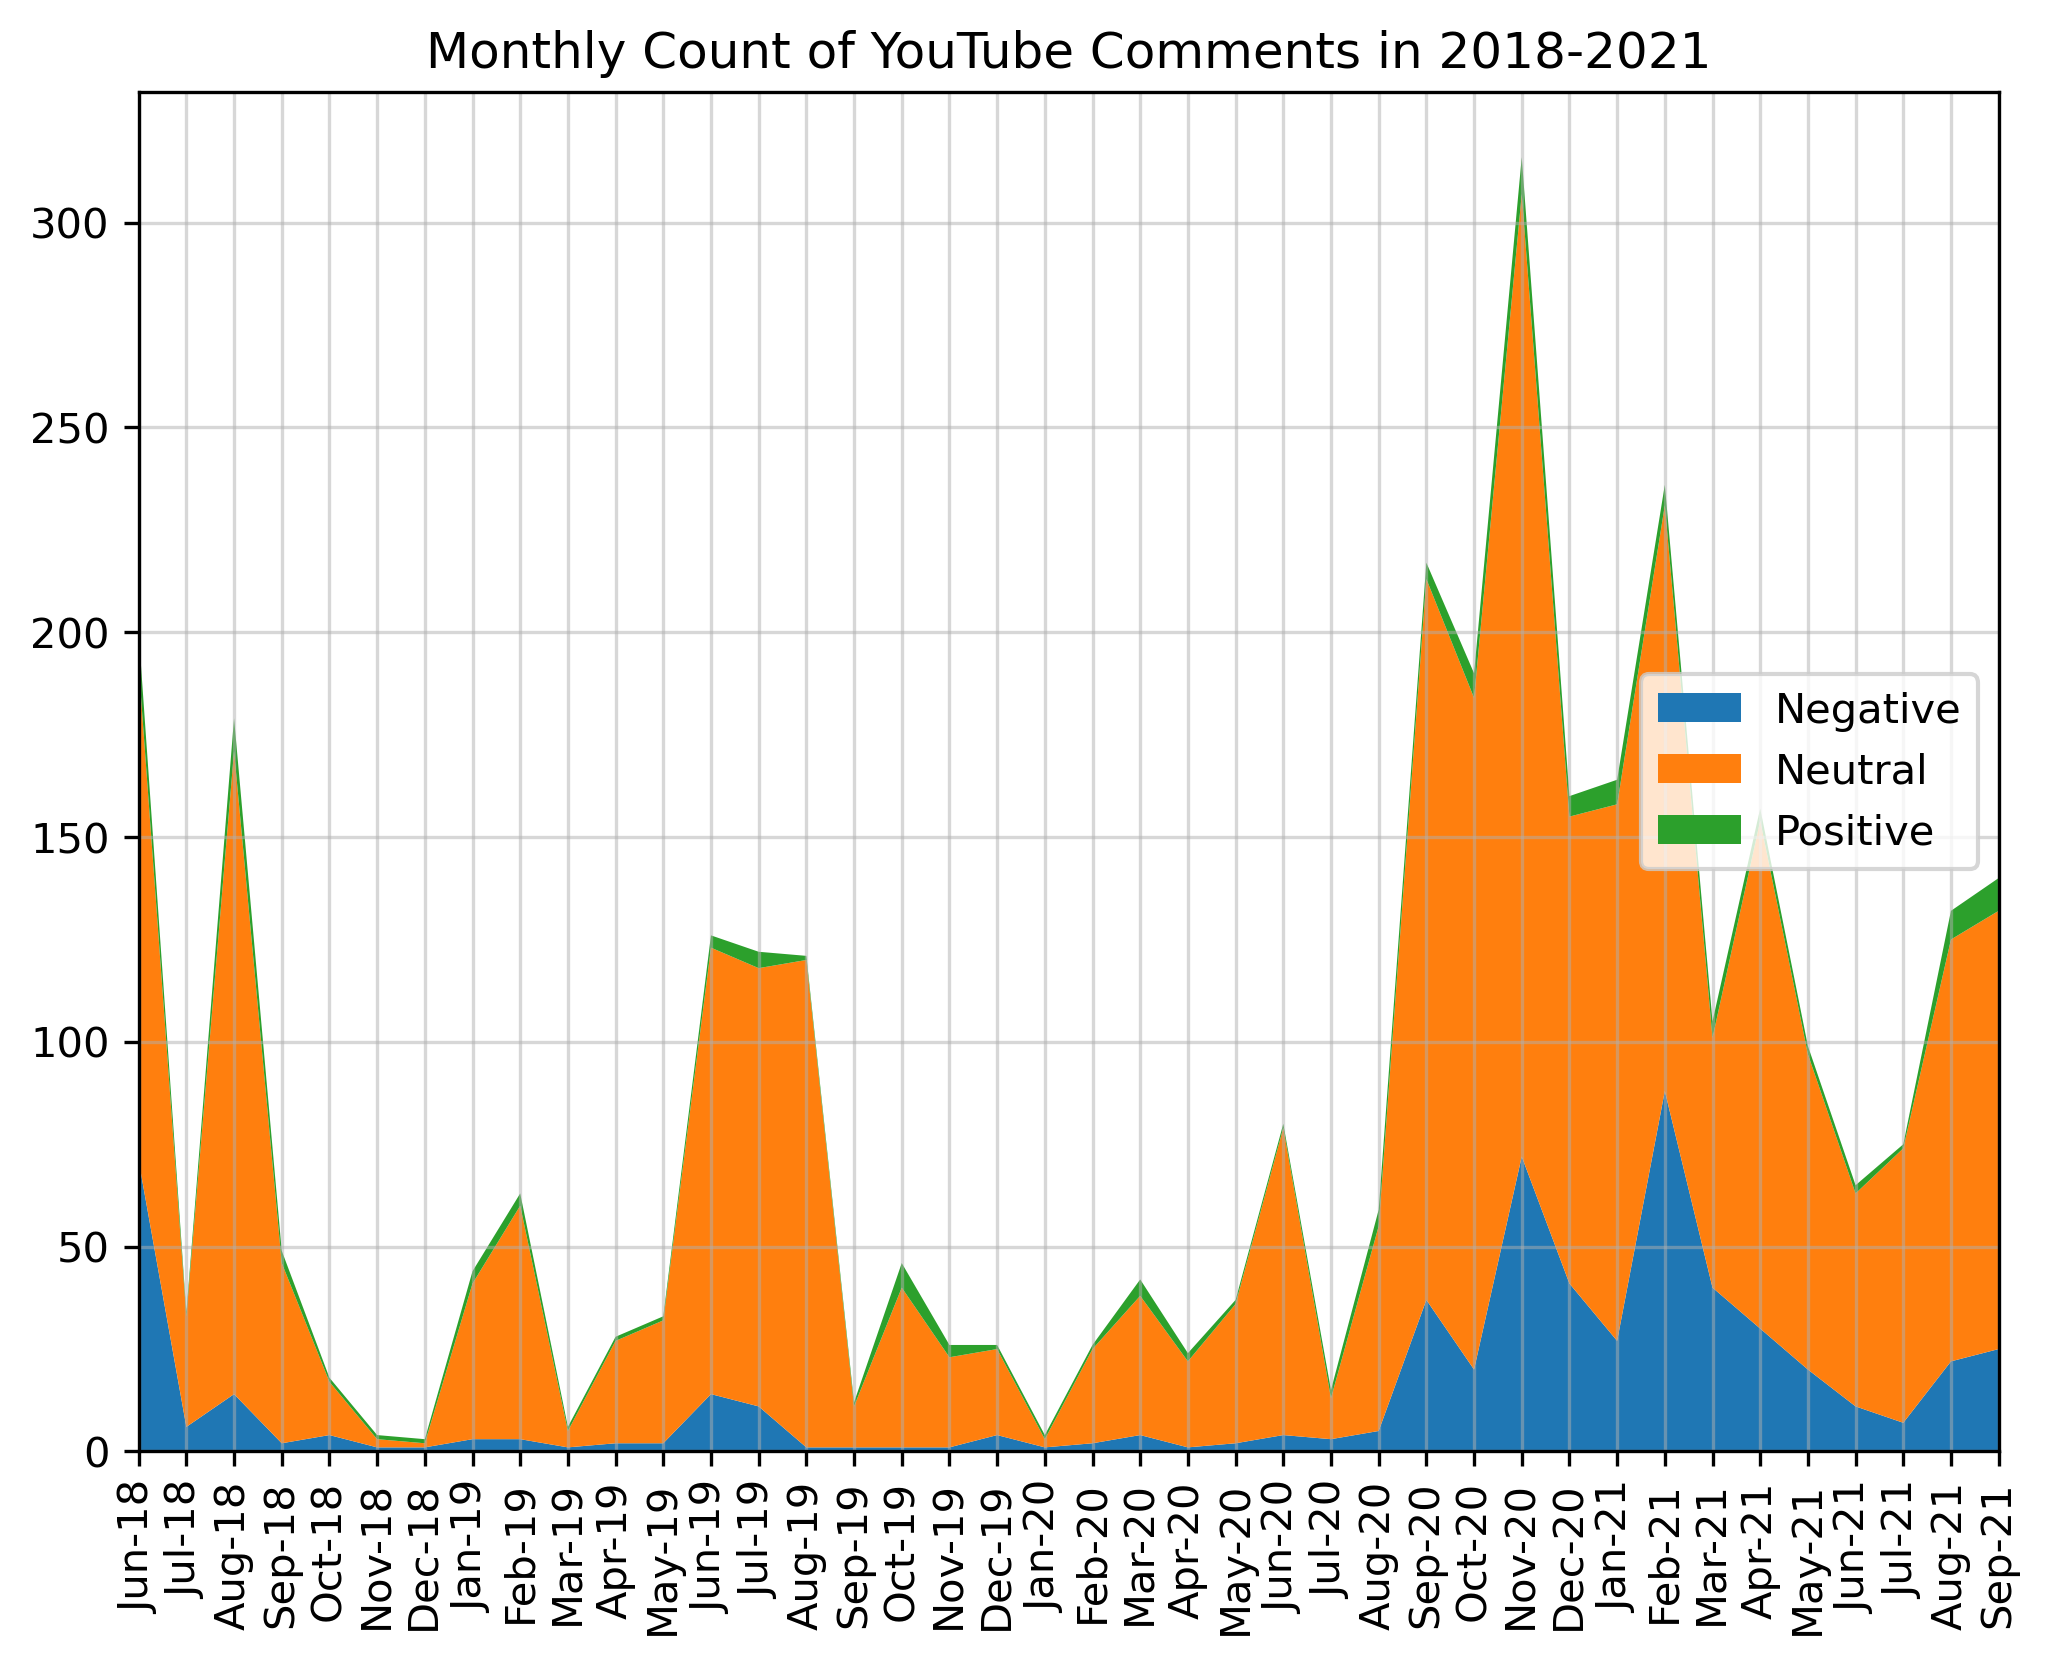

In [69]:
y1, y2, y3 = df['Negative'], df['Neutral'], df['Positive']

plt.figure(figsize=(8,6), dpi=300)
plt.stackplot(x, y1, y2, y3, labels=['Negative','Neutral','Positive'])
plt.legend(loc='right')
plt.xlim(month_dict['Jun-18'], month_dict['Sep-21'])
plt.title('Monthly Count of YouTube Comments in 2018-2021')
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.savefig('count.png', dpi=300, bbox_inches='tight')
plt.show()

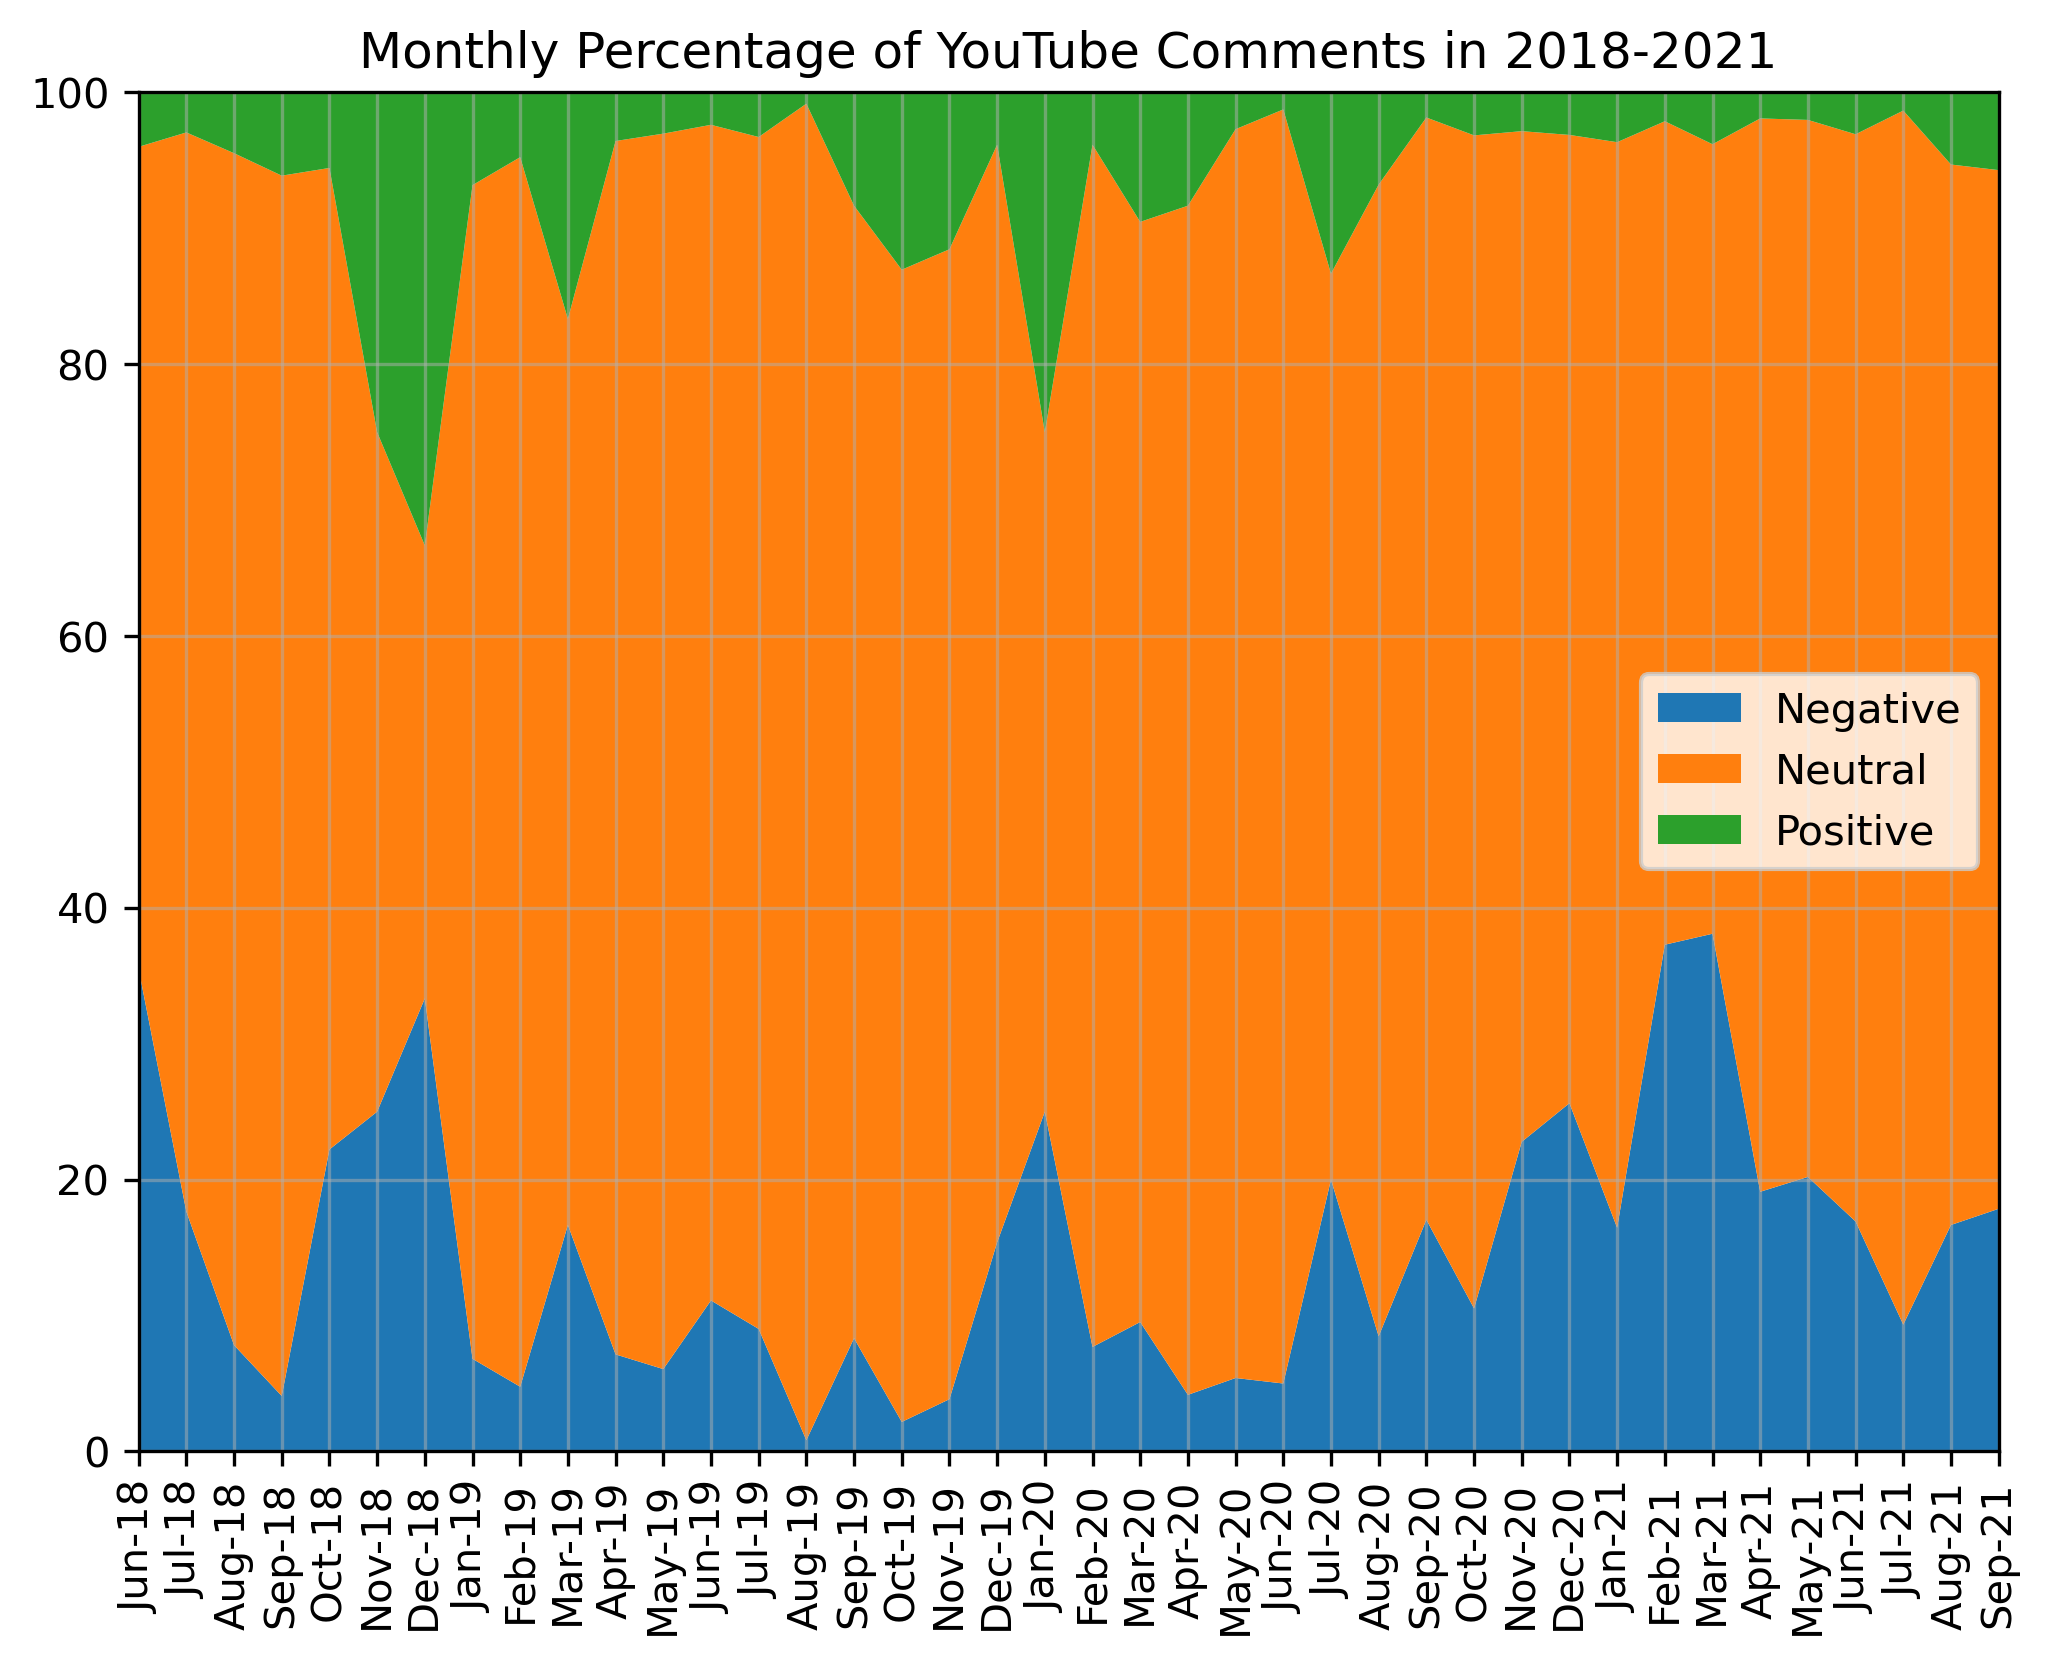

In [70]:
y1, y2, y3 = df['Negative'], df['Neutral'], df['Positive']
y = y1 + y2 + y3
y1 = y1 / y * 100
y2 = y2 / y * 100
y3 = y3 / y * 100

plt.figure(figsize=(8,6), dpi=300)
plt.stackplot(x, y1, y2, y3, labels=['Negative','Neutral','Positive'])
plt.legend(loc='right')
plt.ylim(0,100)
plt.xlim(month_dict['Jun-18'], month_dict['Sep-21'])
plt.title('Monthly Percentage of YouTube Comments in 2018-2021')
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.savefig('percentage.png', dpi=300, bbox_inches='tight')
plt.show()